In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
from scipy import stats
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '../../paper/figs/source/supplemental_2'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
fig_count = 0

# PyFR analysis

In [5]:
pyFR_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr.csv'), index_col=0)

In [59]:
pyFR_df

,across,within,Subject,R,Sample rate,Samples,Thresholded electrodes,Sessions,Number thresholded,Total time (h),Average session length (hrs),Total electrodes,Proportion thresholded,Average session length (h)
0,1.237502,0.757781,31,[-63.64 -21.93 5.37],250.0,3465000,10,7.0,42,3.850,0.550,52,0.808,0.550
1,1.298234,0.758622,8,[-48.48 38.4 17.26],250.0,1549237,121,2.0,2,1.721,0.860,123,0.016,0.860
2,0.802425,0.576144,13,[ 49.49 -34.7 35.17],250.0,2454000,44,4.0,79,2.727,0.682,123,0.642,0.682
3,0.759934,0.479166,52,[ 65.66 -67.29 25.83],250.0,3600000,82,2.0,16,4.000,2.000,98,0.163,2.000
4,1.006843,0.555212,25,[-36.36 -1.81 59.76],250.0,447750,98,1.0,2,0.498,0.498,100,0.020,0.498
5,0.346254,0.557312,38,[-67.68 -2.73 -8.5 ],250.0,1275003,68,3.0,14,1.417,0.472,82,0.171,0.472
6,0.592525,0.203947,49,[ 29.29 -12.3 -25.74],250.0,2700000,123,1.0,37,3.000,3.000,160,0.231,3.000
7,0.677670,0.159440,18,[-49.49 34.96 -20.63],250.0,1291750,77,2.0,7,1.435,0.718,84,0.083,0.718
8,1.098576,0.513811,21,[ 44.44 -19.36 59.92],250.0,257500,58,1.0,27,0.286,0.286,85,0.318,0.286
9,0.472908,0.429546,31,[-65.66 -33.98 -1.79],250.0,3465000,10,7.0,42,3.850,0.550,52,0.808,0.550


In [64]:
pyFR_df[pyFR_df['Samples'] == pyFR_df['Samples'].max()]

,across,within,Subject,R,Sample rate,Samples,Thresholded electrodes,Sessions,Number thresholded,Total time (h),Average session length (hrs),Total electrodes,Proportion thresholded,Average session length (h)
78,0.879753,0.515653,62,[-55.56 25.89 -2.08],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
90,0.518243,0.278901,62,[-19.19 0.98 -22.59],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
108,0.799433,0.997234,62,[-50.51 -13.85 -13.91],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
120,1.278553,0.909630,62,[-41.41 -18.07 -11.77],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
204,1.666976,0.436026,62,[ 28.28 40.26 -23.89],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
209,1.766919,0.452998,62,[ 48.48 -7.77 -11.18],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
488,0.856266,0.633855,62,[-28.28 0. -23.84],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
500,0.254789,0.034660,62,[-52.53 -70.58 30.01],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
635,2.017331,0.401565,62,[ 37.37 -3.6 -12.13],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368
668,1.517058,0.493237,62,[ 47.47 -6.64 -13.49],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379,2.368


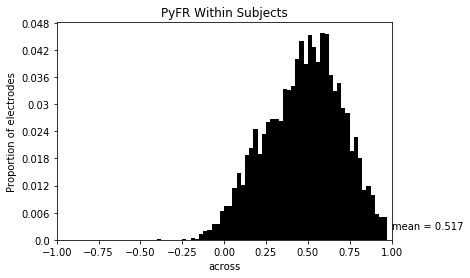

In [7]:
plot.plot_corr_hist(pyFR_df, X='across', title='PyFR Within Subjects' )

## z-transform to group by patient

In [8]:
pyFR_df['within'] = plot.r2z(pyFR_df['within'])
pyFR_df['across'] = plot.r2z(pyFR_df['across'])

In [9]:
grouped_results_pyfr = pyFR_df.groupby('Subject')['within', 'across', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total time (h)', 'Average session length (h)', 
                                                  'Total electrodes', 'Proportion thresholded'].mean()

In [10]:
grouped_results_pyfr.head()

,within,across,Sample rate,Samples,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
Subject,,,,,,,,,,
0,0.230378,0.836986,250.0,840750,2.0,10,0.934,0.467,64,0.156
1,0.493274,0.845447,250.0,1140710,1.0,12,1.267,1.267,40,0.300
2,0.494813,0.869945,250.0,1358998,2.0,53,1.510,0.755,96,0.552
3,0.349534,0.659999,250.0,2999442,2.0,5,3.333,1.666,16,0.312
4,0.426080,0.676345,250.0,2428415,3.0,4,2.698,0.899,64,0.062


In [56]:
grouped_results_pyfr.shape

(67, 10)

(-0.3191927497236319, 0.008468566782741575)


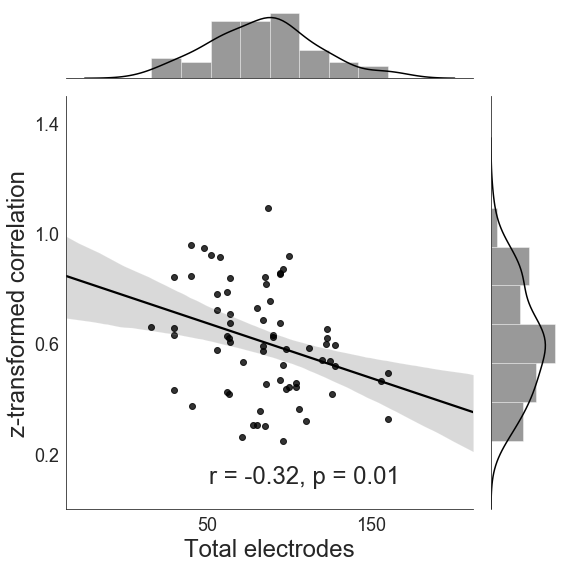

In [12]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr, 'Total electrodes', 'across', outfile=outfile)

(0.14438569768606327, 0.24372481210690586)


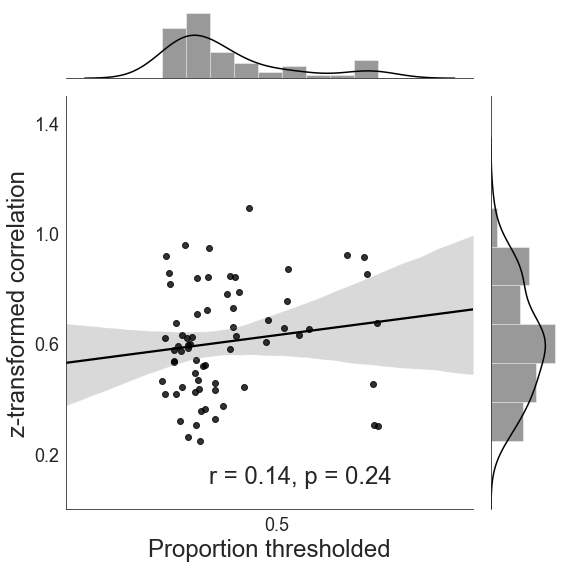

In [13]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr, 'Proportion thresholded', 'across', outfile=outfile)

(0.1996543828363456, 0.10526631893831795)


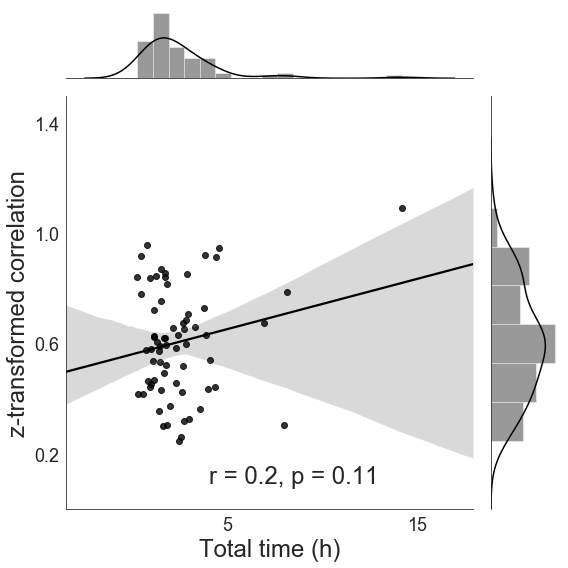

In [14]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr, 'Total time (h)','across', outfile=outfile)

(0.03428791766696787, 0.782964401352076)


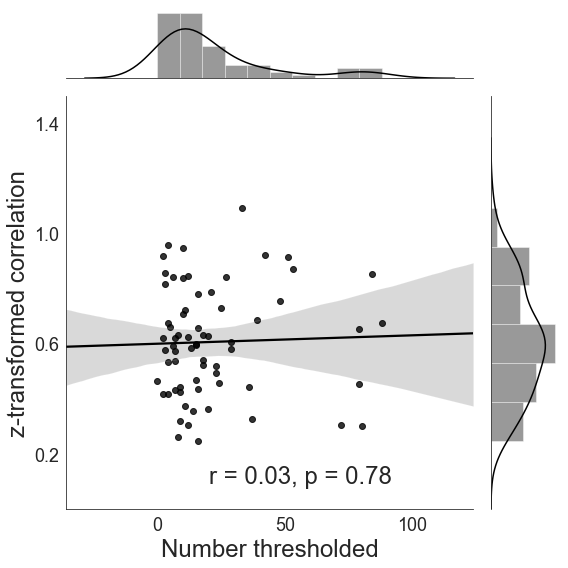

In [15]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr,'Number thresholded', 'across', title='Number Thresholded', outfile=outfile)

(0.21174485196997606, 0.0854045912720796)


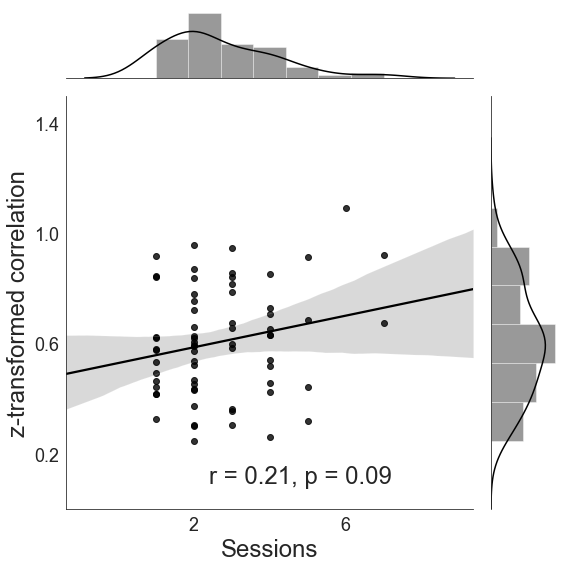

In [16]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr,'Sessions', 'across', outfile=outfile)

(-0.08970466814711804, 0.4703537702889562)


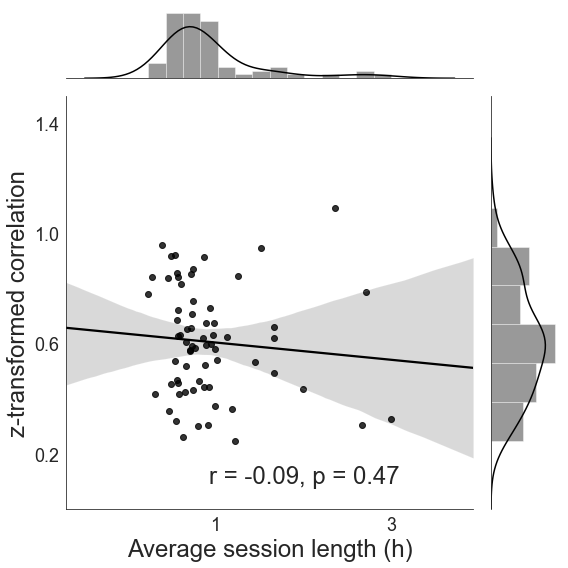

In [17]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr,'Average session length (h)', 'across', outfile=outfile)

# RAM

In [18]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)

In [57]:
RAM_df.shape

(3159, 20)

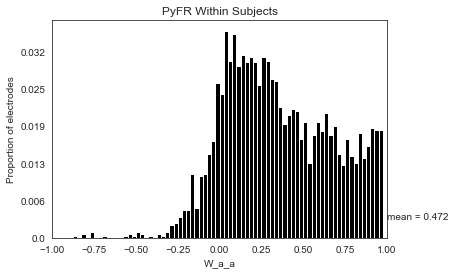

In [19]:

plot.plot_corr_hist(RAM_df, X='W_a_a', title='PyFR Within Subjects')

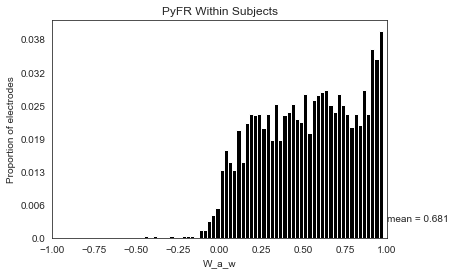

In [20]:

plot.plot_corr_hist(RAM_df, X='W_a_w', title='PyFR Within Subjects')

In [21]:
RAM_df['W_w_w'] = plot.r2z(RAM_df['W_w_w'])
RAM_df['W_a_w'] = plot.r2z(RAM_df['W_a_w'])
RAM_df['W_a_all'] = plot.r2z(RAM_df['W_a_all'])
RAM_df['W_a_a'] = plot.r2z(RAM_df['W_a_a'])
RAM_df['W_w_all'] = plot.r2z(RAM_df['W_w_all'])
RAM_df['W_w_a'] = plot.r2z(RAM_df['W_w_a'])

grouped_results_ram = RAM_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total time (h)', 'Average session length (h)', 
                                                  'Total electrodes', 'Proportion thresholded'].mean()

grouped_results_ram.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
Subject,,,,,,,,,,,,,,
0,0.219335,0.227032,0.188312,0.824195,0.312150,0.815626,250.0,8.026894e+05,1.484848,21.424242,0.891848,0.637303,104.000000,0.206273
1,0.086401,0.049168,0.073796,0.505154,0.363341,0.490492,250.0,1.716483e+06,2.391304,15.956522,1.907116,0.822362,120.000000,0.132971
2,0.091786,0.468861,0.138985,1.185209,0.548432,0.760054,250.0,1.056302e+06,1.432039,13.961165,1.173971,0.835684,120.000000,0.116010
3,0.089896,0.138021,0.139651,0.607879,0.375316,0.575043,250.0,2.596724e+06,2.495652,24.843478,2.885513,0.904522,86.000000,0.289009
4,0.412031,0.294355,0.138055,1.435772,0.459055,0.880029,250.0,1.885163e+06,1.804469,33.055866,2.094525,1.495196,125.977654,0.266698


In [55]:
grouped_results_ram['Average session length (h)'].min()

0.5537851851851836

(0.03709325905553136, 0.863376966431979)


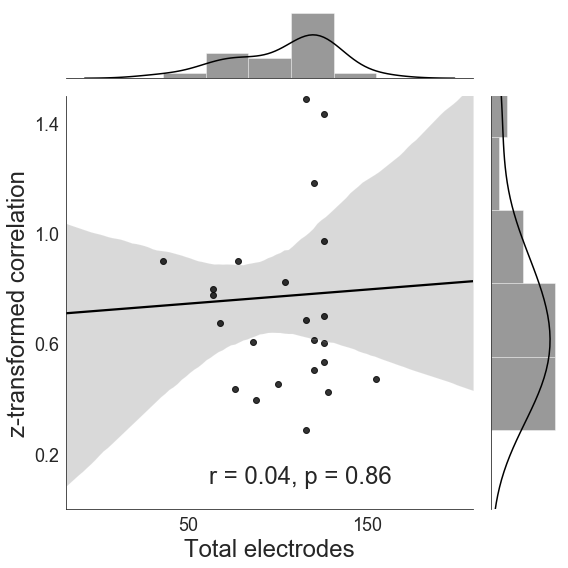

In [22]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Total electrodes', 'W_a_w', outfile=outfile)

(-0.3154733198902164, 0.13318904205283377)


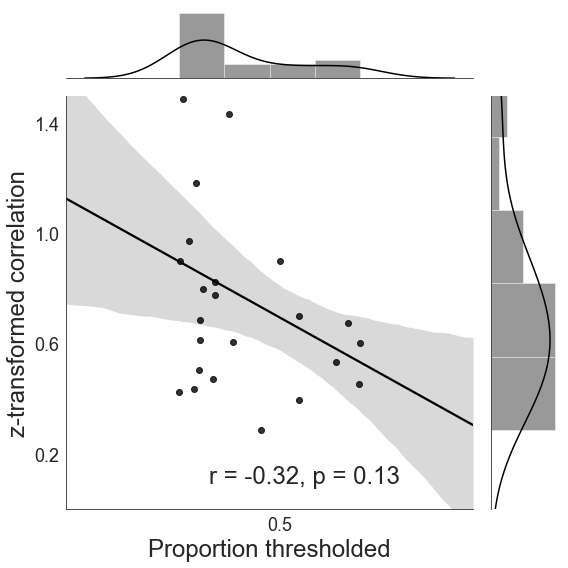

In [23]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Proportion thresholded', 'W_a_w', outfile=outfile)

(-0.11454502492353284, 0.5940634491953609)


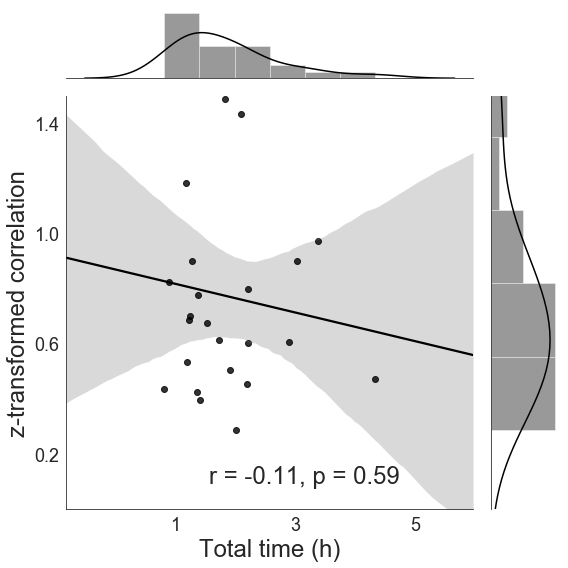

In [24]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Total time (h)', 'W_a_w', outfile=outfile)

(-0.292671534499447, 0.16517925116278756)


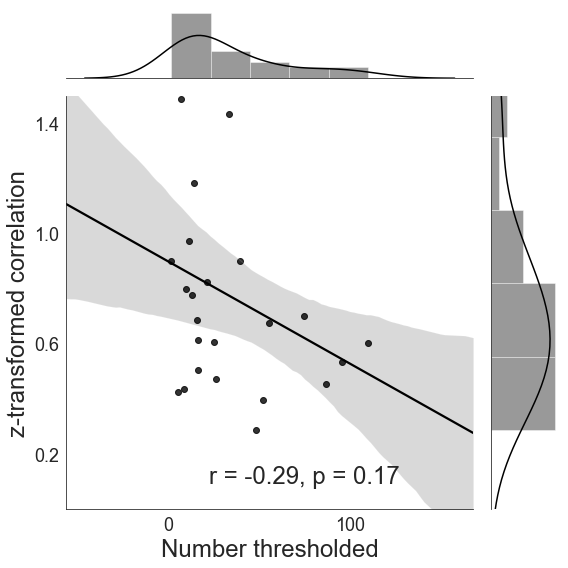

In [25]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram,'Number thresholded', 'W_a_w', outfile=outfile)

(-0.19429241828895938, 0.36296276287091156)


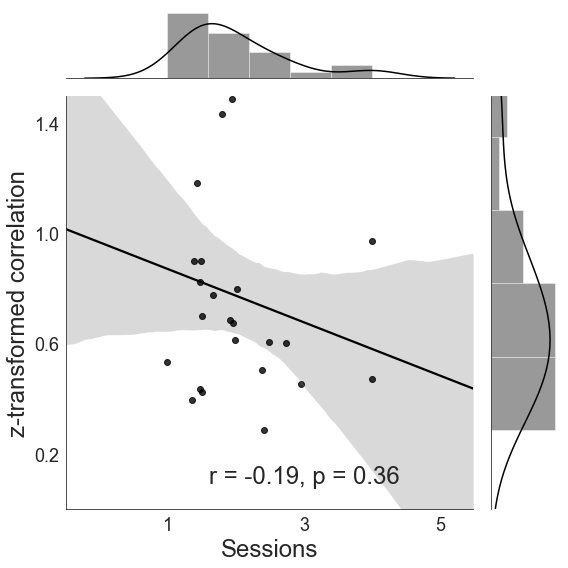

In [26]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Sessions', 'W_a_w', outfile=outfile)

(0.16234075446713636, 0.44851285438799016)


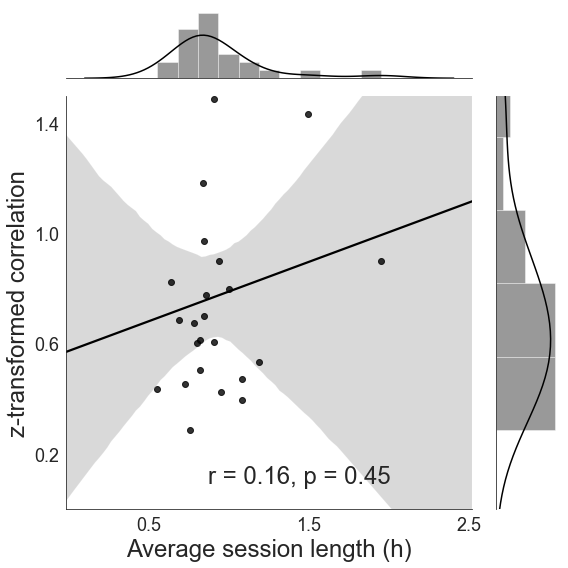

In [27]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Average session length (h)', 'W_a_w', title='Proportion Thresholded', outfile=outfile)

## FR


In [28]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)
str_find = '_FR1'
str_find
FR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]
FR_df['W_w_w'] = plot.r2z(FR_df['W_w_w'])
FR_df['W_a_w'] = plot.r2z(FR_df['W_a_w'])
FR_df['W_a_all'] = plot.r2z(FR_df['W_a_all'])
FR_df['W_a_a'] = plot.r2z(FR_df['W_a_a'])
FR_df['W_w_all'] = plot.r2z(FR_df['W_w_all'])
FR_df['W_w_a'] = plot.r2z(FR_df['W_w_a'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [29]:
grouped_results_fr = FR_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total time (h)', 'Average session length (h)', 
                                                  'Total electrodes', 'Proportion thresholded'].mean()

grouped_results_fr.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
Subject,,,,,,,,,,,,,,
0,0.203220,0.208441,0.188120,0.650405,0.247094,0.694877,250.0,668750,1.0,19,0.743,0.743,104,0.183
1,0.050210,0.085265,0.104204,0.269297,0.580976,0.411948,250.0,2807340,4.0,24,3.119,0.780,120,0.200
2,0.295617,0.038305,0.092890,0.709230,0.090166,0.329801,250.0,1410000,2.0,31,1.567,0.784,120,0.258
3,0.140451,0.170120,0.150425,0.261489,0.462300,0.660974,250.0,5959750,5.0,43,6.622,1.324,86,0.500
4,0.454434,0.215316,0.102588,1.712125,0.502769,1.056973,250.0,2011725,3.0,48,2.235,0.745,120,0.400


mean: 2.297


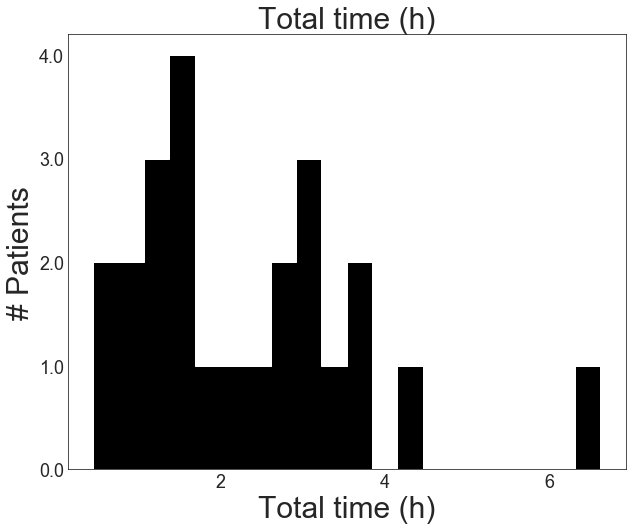

In [30]:
plot.plot_hist_by_patient(grouped_results_fr, 'Total time (h)', title=None, outfile=None)

mean: 2.5


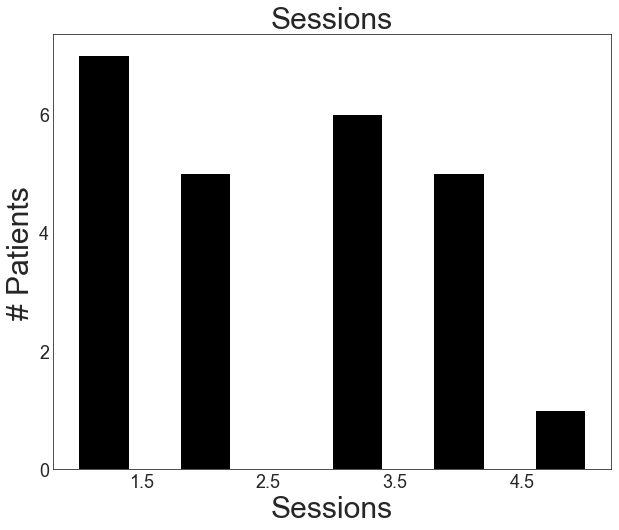

In [31]:
plot.plot_hist_by_patient(grouped_results_fr, 'Sessions', bins=10, title=None)

mean: 0.931


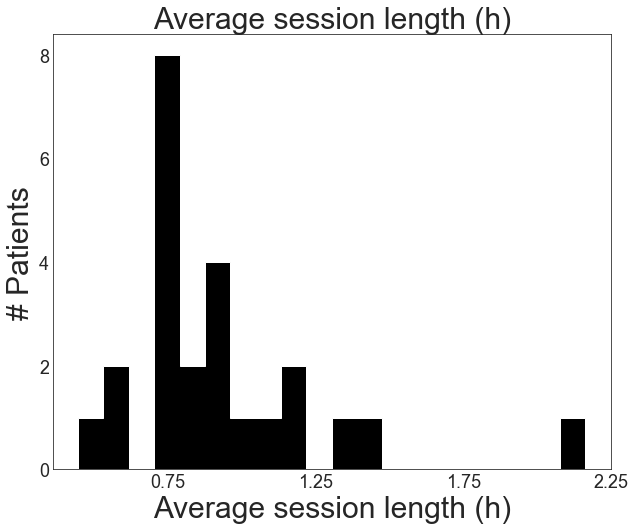

In [32]:
plot.plot_hist_by_patient(grouped_results_fr, 'Average session length (h)')

mean: 0.375


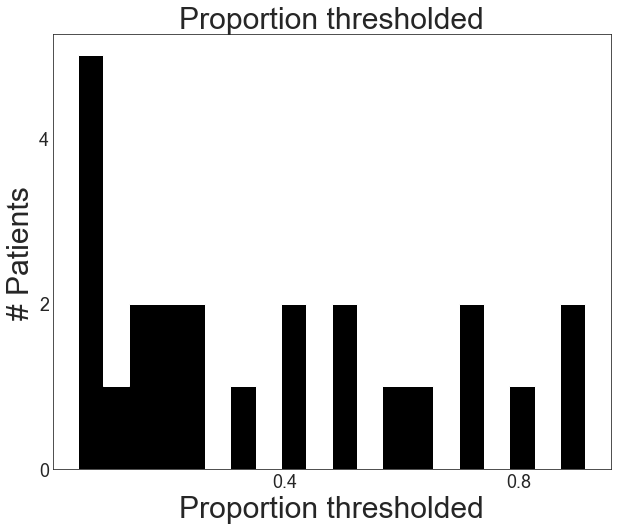

In [33]:
plot.plot_hist_by_patient(grouped_results_fr, 'Proportion thresholded',title=None)

mean: 102.417


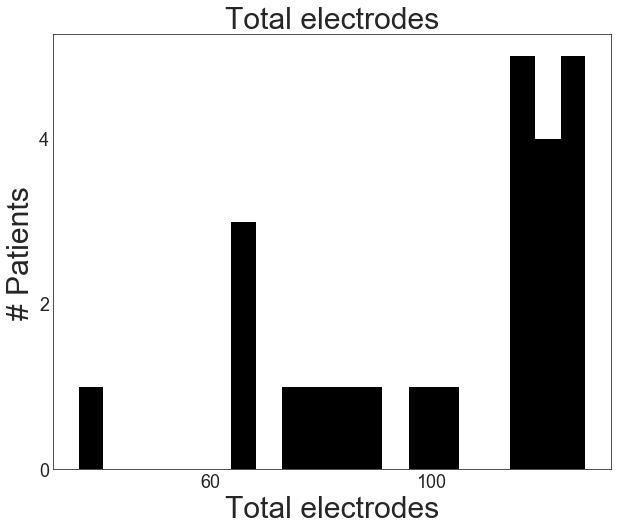

In [34]:
plot.plot_hist_by_patient(grouped_results_fr, 'Total electrodes')

mean: 39.708


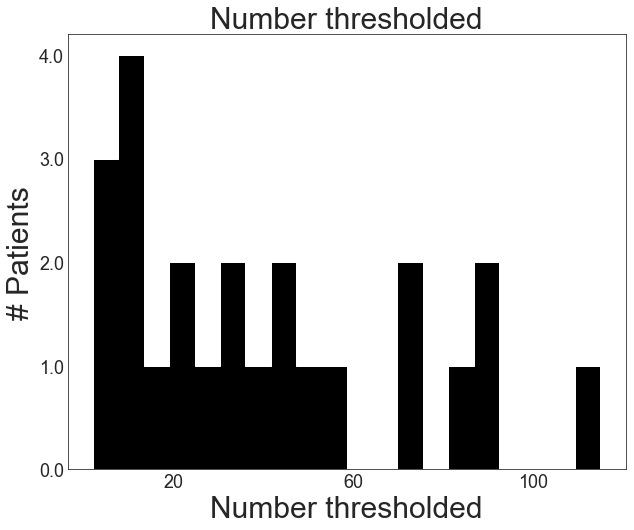

In [35]:
plot.plot_hist_by_patient(grouped_results_fr, 'Number thresholded')

## CatFR

In [36]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)
str_find = '_CatFR1'
str_find
CatFR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]
CatFR_df['W_w_w'] = plot.r2z(CatFR_df['W_w_w'])
CatFR_df['W_a_w'] = plot.r2z(CatFR_df['W_a_w'])
CatFR_df['W_a_all'] = plot.r2z(CatFR_df['W_a_all'])
CatFR_df['W_a_a'] = plot.r2z(CatFR_df['W_a_a'])
CatFR_df['W_w_all'] = plot.r2z(CatFR_df['W_w_all'])
CatFR_df['W_w_a'] = plot.r2z(CatFR_df['W_w_a'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [37]:
grouped_results_catfr = CatFR_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total time (h)', 'Average session length (h)', 
                                                  'Total electrodes', 'Proportion thresholded'].mean()
grouped_results_catfr.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
Subject,,,,,,,,,,,,,,
0,0.236458,0.246786,0.188515,1.008846,0.381273,0.943923,250.0,945000,2.0,24,1.050,0.525,104,0.231
1,0.117700,0.017950,0.047498,0.709139,0.175115,0.558422,250.0,773040,1.0,9,0.859,0.859,120,0.075
2,-0.063265,0.796378,0.174049,1.547278,0.897028,1.087341,250.0,787250,1.0,1,0.875,0.875,120,0.008
3,0.059703,0.118851,0.133216,0.814751,0.323368,0.523723,250.0,588250,1.0,14,0.654,0.654,86,0.163
4,0.383499,0.347540,0.161920,1.249815,0.429639,0.760964,250.0,1800000,1.0,23,2.000,2.000,130,0.177


mean: 1.465


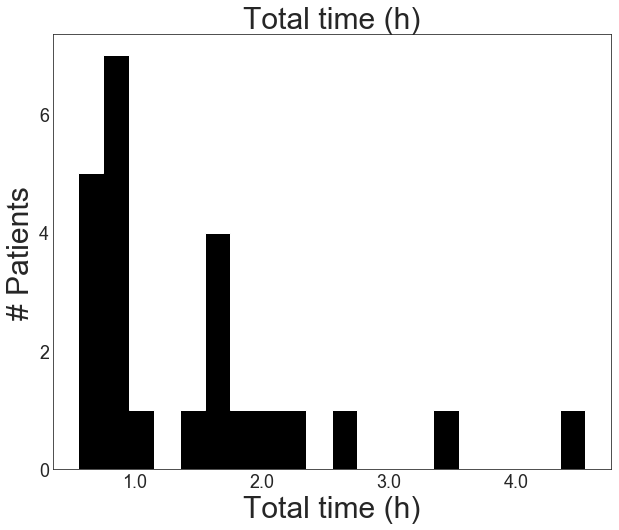

In [38]:
plot.plot_hist_by_patient(grouped_results_catfr, 'Total time (h)')

mean: 1.667


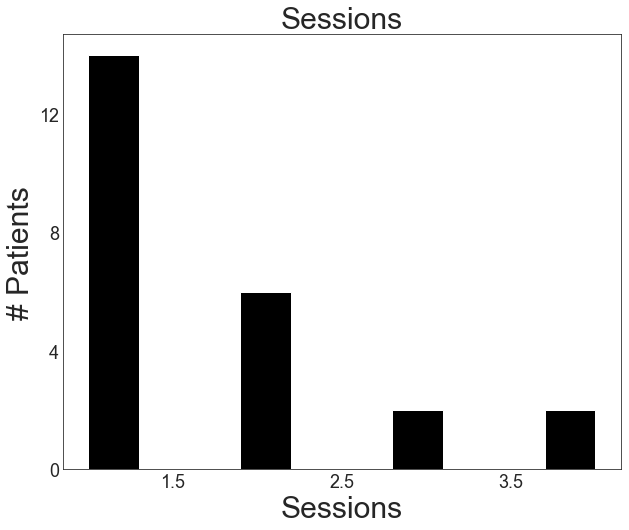

In [39]:
plot.plot_hist_by_patient(grouped_results_catfr, 'Sessions', bins=10)

mean: 0.886


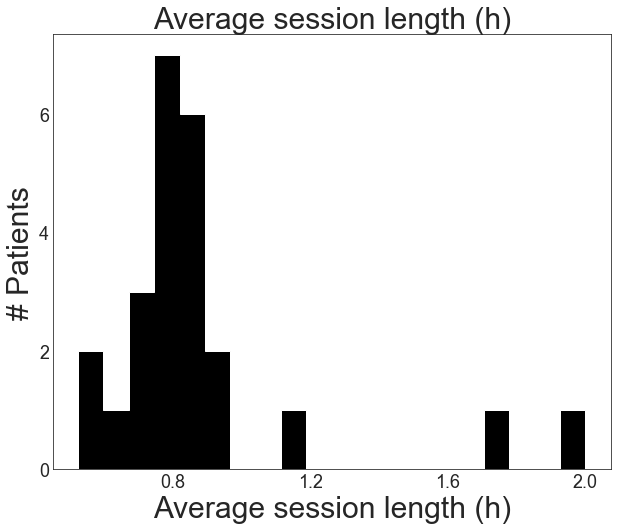

In [40]:
plot.plot_hist_by_patient(grouped_results_catfr, 'Average session length (h)')

mean: 0.316


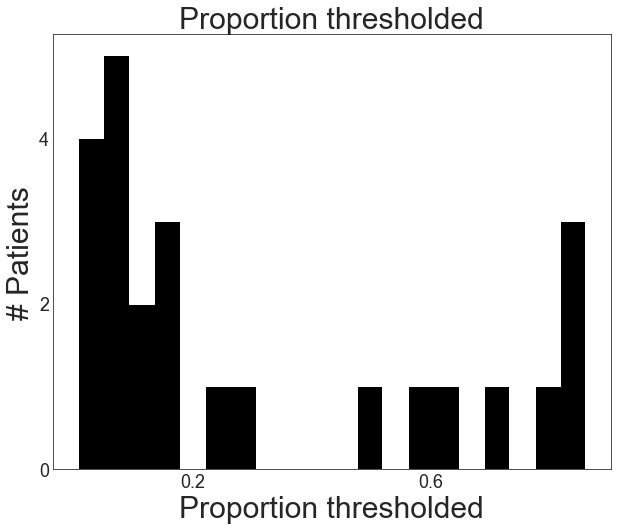

In [41]:
plot.plot_hist_by_patient(grouped_results_catfr, 'Proportion thresholded')

mean: 104.833


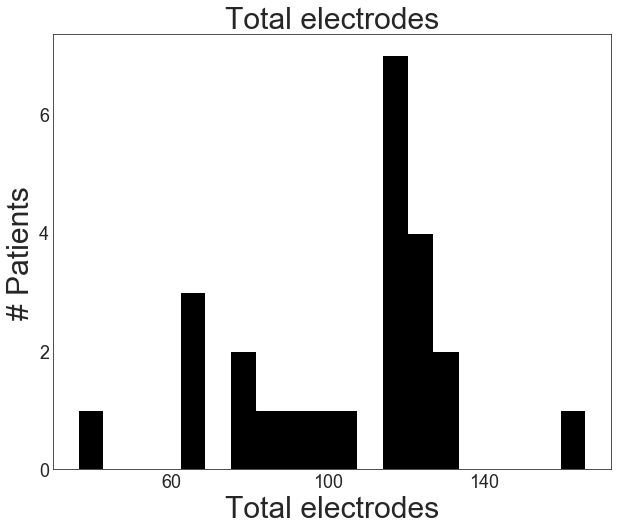

In [42]:
plot.plot_hist_by_patient(grouped_results_catfr, 'Total electrodes')

mean: 31.875


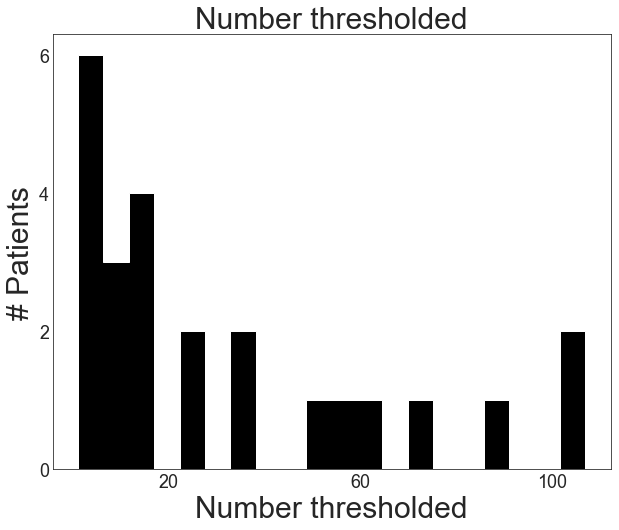

In [43]:
plot.plot_hist_by_patient(grouped_results_catfr, 'Number thresholded')